<a href="https://colab.research.google.com/github/kirito-hn/challenge-telecom-x-analise-evasao-clientes/blob/main/Challenge_TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [212]:
#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [213]:
#Acessando base de dados a ser utilizada:
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [214]:
#Criando Data Frame.
df=pd.read_json(url)

In [215]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [216]:
#Verificando os tipos de dados do data frame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [217]:
#Normalizando a base dados para extender as colunas com as informações necessárias.
colunas_json = ['customer', 'phone', 'internet', 'account']

df_final = df.drop(colunas_json, axis=1)

for coluna in colunas_json:
    df_normalizado = pd.json_normalize(df[coluna])
    df_final = pd.concat([df_final, df_normalizado], axis=1)

df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [218]:
#Verificando novamente os tipos de dados no data frame.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [219]:
#Verificando ocorrencia de valores Nulos.
print(df_final['Charges.Total'].isnull().sum())




0


In [220]:
#convertendo os valores numéricos de 'object' para "int" ou "float"
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
#tratando os valores ausentes da coluna 'Charges.Total'.
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

In [221]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [222]:
#Analisando os dados únicos que aparecem nas colunas para melhor compreenção e tratamento dos dados.

for coluna in df_final.columns:
    print(f"\nValores únicos e contagens para coluna {coluna}:")
    print(df_final[coluna].value_counts())


Valores únicos e contagens para coluna customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Valores únicos e contagens para coluna Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos e contagens para coluna gender:
gender
Male      3675
Female    3592
Name: count, dtype: int64

Valores únicos e contagens para coluna SeniorCitizen:
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64

Valores únicos e contagens para coluna Partner:
Partner
No     3749
Yes    3518
Name: count, dtype: int64

Valores únicos e contagens para coluna Dependents:
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

Valores únicos e contagens para coluna tenure:
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0    

In [223]:
#Foram identificadas colunas que possuem valores "0","1","Yes"e "No".Para fazer uma padronização de dados e melhorar a vizualização,
#eles serão convertidos para False : "0" e "No" ou True: "1"e"Yes".
colunas_boleanas= [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling','SeniorCitizen'
]

df_final[colunas_boleanas] = df_final[colunas_boleanas].replace({'Yes' : True, 'No' : False,0:False,1:True})
display(df_final)

/tmp/ipython-input-4055534610.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[colunas_boleanas] = df_final[colunas_boleanas].replace({'Yes' : True, 'No' : False,0:False,1:True})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,False,False,False,13,True,False,DSL,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,False,True,False,22,True,True,Fiber optic,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,False,False,False,2,True,False,DSL,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,False,True,True,67,True,False,DSL,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


In [224]:
#Tratando a coluna "Churn"
df_final['Churn']=df_final['Churn'].replace({'Yes': True,'No':False,'':'Não identificado'})

In [225]:
df_final['gender']=df_final['gender'].replace({'Female': 'Mulher','Male':'Homem'})

In [226]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Mulher,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,Homem,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,Homem,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Homem,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Mulher,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Mulher,False,False,False,13,True,False,DSL,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,True,Homem,False,True,False,22,True,True,Fiber optic,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,False,Homem,False,False,False,2,True,False,DSL,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,False,Homem,False,True,True,67,True,False,DSL,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


In [227]:
#Verificando novamente se tem outros dados que precisão ser alterados.
for coluna in df_final.columns:
    print(f"\nValores únicos e contagens para coluna {coluna}:")
    print(df_final[coluna].value_counts())


Valores únicos e contagens para coluna customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Valores únicos e contagens para coluna Churn:
Churn
False               5174
True                1869
Não identificado     224
Name: count, dtype: int64

Valores únicos e contagens para coluna gender:
gender
Homem     3675
Mulher    3592
Name: count, dtype: int64

Valores únicos e contagens para coluna SeniorCitizen:
SeniorCitizen
False    6085
True     1182
Name: count, dtype: int64

Valores únicos e contagens para coluna Partner:
Partner
False    3749
True     3518
Name: count, dtype: int64

Valores únicos e contagens para coluna Dependents:
Dependents
False    5086
True     2181
Name: count, dtype: int64

Valores únicos e contagens para coluna tenure:
tenure
1     634
72    369
2     246
3     207
4     185


In [228]:
#Para reoorderna o índice após as alterações realizadas, ele será resetado usando o reset_index.
df_final=df_final.reset_index(drop=True)

In [229]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Mulher,False,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,Homem,False,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,Homem,False,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Homem,True,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Mulher,True,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Mulher,False,False,False,13,True,False,DSL,...,False,False,True,False,False,One year,False,Mailed check,55.15,742.90
7263,9992-RRAMN,True,Homem,False,True,False,22,True,True,Fiber optic,...,False,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70
7264,9992-UJOEL,False,Homem,False,False,False,2,True,False,DSL,...,True,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75
7265,9993-LHIEB,False,Homem,False,True,True,67,True,False,DSL,...,False,True,True,False,True,Two year,False,Mailed check,67.85,4627.65


#Dicionário de dados
###customerID: número de identificação único de cada cliente
###Churn: se o cliente deixou ou não é a empresa
###gender: gênero (masculino e feminino)
###SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
###Partner: se o cliente possui ou não é parceiro ou parceira
###Dependents: se o cliente possui ou não depende
###tenure: meses de contrato do cliente
###PhoneService: assinatura de serviço telefônico
###MultipleLines:assisnatura de mais de uma linha de telefone
###InternetService: assinatura de um provedor de internet
###OnlineSecurity: assinatura adicional de segurança on-line
###OnlineBackup: assinatura adicional de backup online
###DeviceProtection: assinatura adicional de proteção no dispositivo
###TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
###StreamingTV: assinatura de TV a cabo
###StreamingMovies: assinatura de streaming de filmes
###Contract: tipo de contrato
###PaperlessBilling: se o cliente preferir receber uma fatura online
###PaymentMethod: forma de pagamento
###Charges.Monthly: total de todos os serviços do cliente por mês
###Charges.Total: gasto total pelo cliente

In [230]:
#Criando a coluna Contas_diarias para verificar o gasto por dia dos clientes dividindo o valor do gasto mensal por 30.
df_final['Contas_diarias']=df_final['Charges.Total']/30



In [231]:
#Tratando possiveis dados nulos da nova coluna criada os substituindo por 0.
df_final['Contas_diarias']=df_final['Contas_diarias'].fillna(0)

In [232]:
#Alterando os nomes das colunas para facilitar a compreensão sobre oque elas se referem.

df_final =df_final.rename(columns= {
    "customerID": "ID_Cliente",
    "Churn": "Churn", # Manter Churn pois é termo comum
    "gender": "Genero",
    "SeniorCitizen": "Idoso",
    "Partner": "Possui_parceiro",
    "Dependents": "Possui_dependentes",
    "tenure": "Meses_contrato",
    "PhoneService": "Servico_telefonico",
    "MultipleLines": "Multiplas_linhas",
    "InternetService": "Servico_internet",
    "OnlineSecurity": "Seguranca_online",
    "OnlineBackup": "Backup_online",
    "DeviceProtection": "Protecao_dispositivo",
    "TechSupport": "Suporte_tecnico",
    "StreamingTV": "Streaming_TV",
    "StreamingMovies": "Streaming_filmes",
    "Contract": "Tipo_contrato",
    "PaperlessBilling": "Fatura_online",
    "PaymentMethod": "Metodo_pagamento",
    "Charges.Monthly": "Cobranca_mensal",
    "Charges.Total": "Cobranca_total",
    "Contas_diarias": "Contas_diarias" # Coluna criada anteriormente
})

In [233]:
df_final

,ID_Cliente,Churn,Genero,Idoso,Possui_parceiro,Possui_dependentes,Meses_contrato,Servico_telefonico,Multiplas_linhas,Servico_internet,...,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_contrato,Fatura_online,Metodo_pagamento,Cobranca_mensal,Cobranca_total,Contas_diarias
0,0002-ORFBO,False,Mulher,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.60,593.30,19.776667
1,0003-MKNFE,False,Homem,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,18.080000
2,0004-TLHLJ,True,Homem,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,9.361667
3,0011-IGKFF,True,Homem,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,41.261667
4,0013-EXCHZ,True,Mulher,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,8.913333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Mulher,False,False,False,13,True,False,DSL,...,False,True,False,False,One year,False,Mailed check,55.15,742.90,24.763333
7263,9992-RRAMN,True,Homem,False,True,False,22,True,True,Fiber optic,...,False,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,62.456667
7264,9992-UJOEL,False,Homem,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,3.091667
7265,9993-LHIEB,False,Homem,False,True,True,67,True,False,DSL,...,True,True,False,True,Two year,False,Mailed check,67.85,4627.65,154.255000


In [234]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Churn                 7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   bool   
 4   Possui_parceiro       7267 non-null   bool   
 5   Possui_dependentes    7267 non-null   bool   
 6   Meses_contrato        7267 non-null   int64  
 7   Servico_telefonico    7267 non-null   bool   
 8   Multiplas_linhas      7267 non-null   object 
 9   Servico_internet      7267 non-null   object 
 10  Seguranca_online      7267 non-null   object 
 11  Backup_online         7267 non-null   object 
 12  Protecao_dispositivo  7267 non-null   object 
 13  Suporte_tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_filmes     

In [235]:
for coluna in df_final.columns:
    print(f"\nValores únicos e contagens para coluna {coluna}:")
    print(df_final[coluna].value_counts())


Valores únicos e contagens para coluna ID_Cliente:
ID_Cliente
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Valores únicos e contagens para coluna Churn:
Churn
False               5174
True                1869
Não identificado     224
Name: count, dtype: int64

Valores únicos e contagens para coluna Genero:
Genero
Homem     3675
Mulher    3592
Name: count, dtype: int64

Valores únicos e contagens para coluna Idoso:
Idoso
False    6085
True     1182
Name: count, dtype: int64

Valores únicos e contagens para coluna Possui_parceiro:
Possui_parceiro
False    3749
True     3518
Name: count, dtype: int64

Valores únicos e contagens para coluna Possui_dependentes:
Possui_dependentes
False    5086
True     2181
Name: count, dtype: int64

Valores únicos e contagens para coluna Meses_contrato:
Meses_contrato
1     634
72    36

#📊 Carga e análise

#Análise Descritiva:


In [236]:
colunas_booleanas = [col for col in df_final.columns if df_final[col].dtype == bool]

In [237]:
df_final['Idoso'].describe()

,Idoso
count,7267
unique,2
top,False
freq,6085


# Churn igual a True o cliente cancelou seus serviços com a empresa e Churn igual a False cliente ainda está ativo na empresa

In [238]:
df_final['Churn'].describe()

,Churn
count,7267
unique,3
top,False
freq,5174


In [239]:
df_final[colunas_booleanas].describe()

,Idoso,Possui_parceiro,Possui_dependentes,Servico_telefonico,Fatura_online
count,7267,7267,7267,7267,7267
unique,2,2,2,2,2
top,False,False,False,True,True
freq,6085,3749,5086,6560,4311


In [240]:
df_final.describe()

,Meses_contrato,Cobranca_mensal,Cobranca_total,Contas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,75.906068
std,24.571773,30.129572,2268.648587,75.621620
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.425000,396.200000,13.206667
50%,29.000000,70.300000,1389.200000,46.306667
75%,55.000000,89.875000,3778.525000,125.950833
max,72.000000,118.750000,8684.800000,289.493333


#Análise da váriavel Churn

/tmp/ipython-input-791372842.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Ativo (False)', 'Evadiu (True)','Não identificado'])


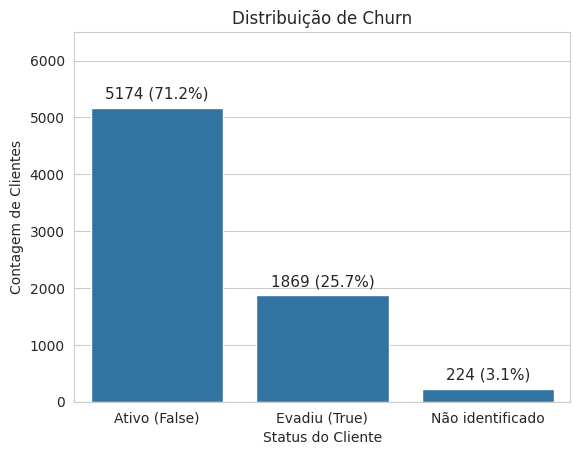

In [241]:

# Contagem de valores
ax = sns.countplot(x='Churn', data=df_final)

# Adicionando rótulos e título
ax.set_title('Distribuição de Churn')
ax.set_xlabel('Status do Cliente')
ax.set_ylabel('Contagem de Clientes')

# Personalizando os rótulos do eixo x

ax.set_xticklabels(['Ativo (False)', 'Evadiu (True)','Não identificado'])
ax.set_ylim(0, 6500)

total = len(df_final)
for p in ax.patches:
    percentage = f'{100*p.get_height()/total:.1f}%'
    ax.annotate(f'{int(p.get_height())} ({percentage})',
                (p.get_x() + p.get_width()/2, p.get_height()
                 ),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=11)




plt.show()


##Análisando o Churn por categoria:

In [242]:
def criar_graficos_distrib_churn(coluna,data_frame):
    plt.figure(figsize=(10, 6))

    # Gráfico de barras horizontais
    ax = sns.countplot(y=coluna, hue='Churn', data=data_frame,
                      palette=['#4e79a7','#f28e2b','#FF0000'])

    # Remover bordas
    sns.despine(left=True, bottom=True)

    # Títulos e rótulos
    plt.title(f'Distribuição de Churn por {coluna}', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Contagem', fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    # Adicionar valores nas barras
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        if width > 0:
          ax.text(width + 0.5,  # Posição x: valor da barra + pequeno offset
                    p.get_y() + p.get_height()/2,  # Posição y: centro da barra
                    f'{int(width)}',  # Texto: valor formatado como inteiro
                    ha='left', va='center',  # Alinhamento horizontal e vertical
                    fontsize=11)


    plt.legend(
    title='Churn',
    labels=['Ativo', 'Evadiu', 'Não identificado'],
    loc='lower left',
    bbox_to_anchor=(1.02, 0.0),  # 1.02 em x para colocar fora
    borderaxespad=0.0             # Remove espaçamento extra
)


    # Ajustar layout
    plt.tight_layout()
    plt.show()

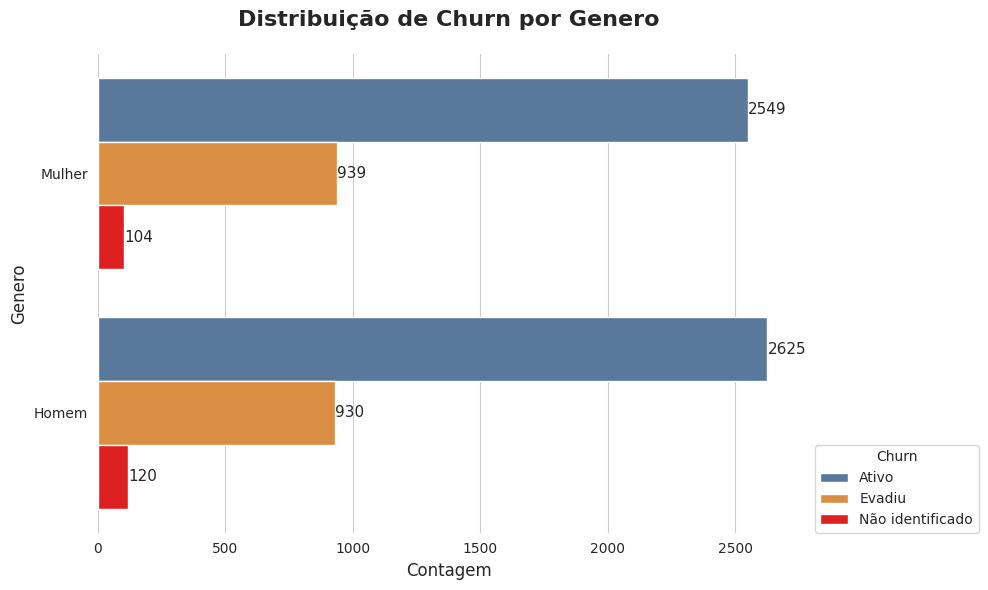

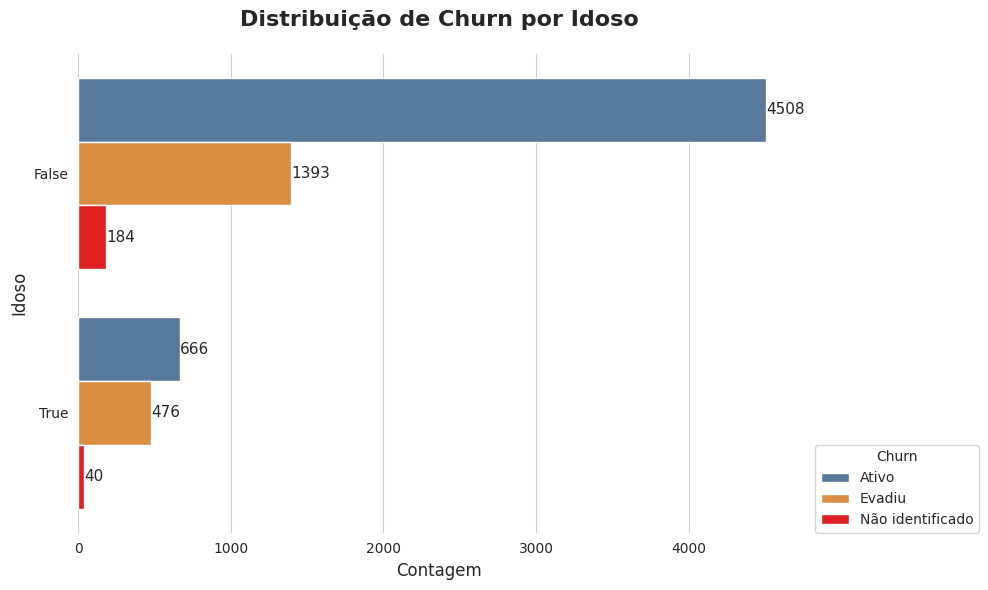

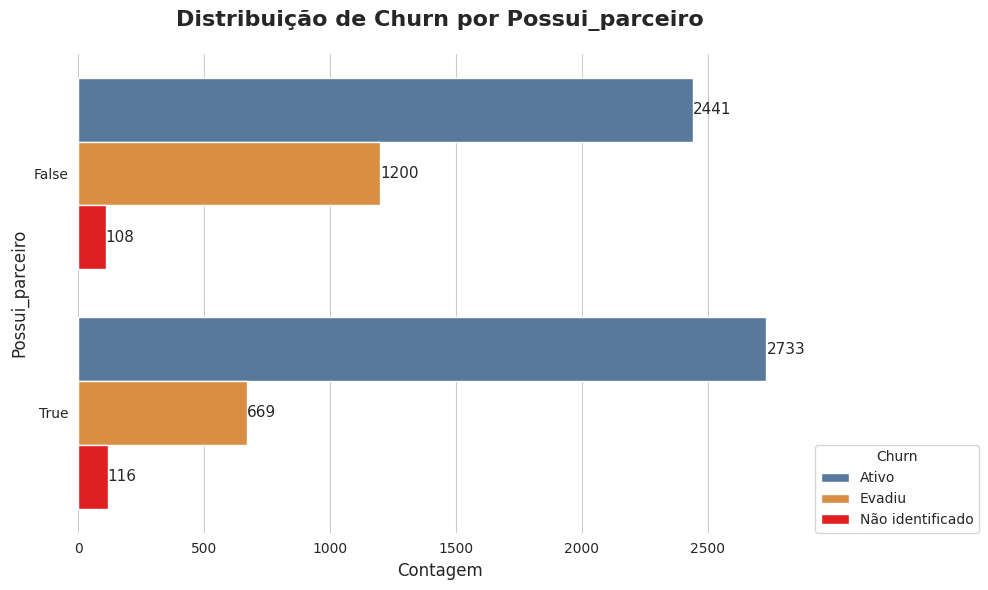

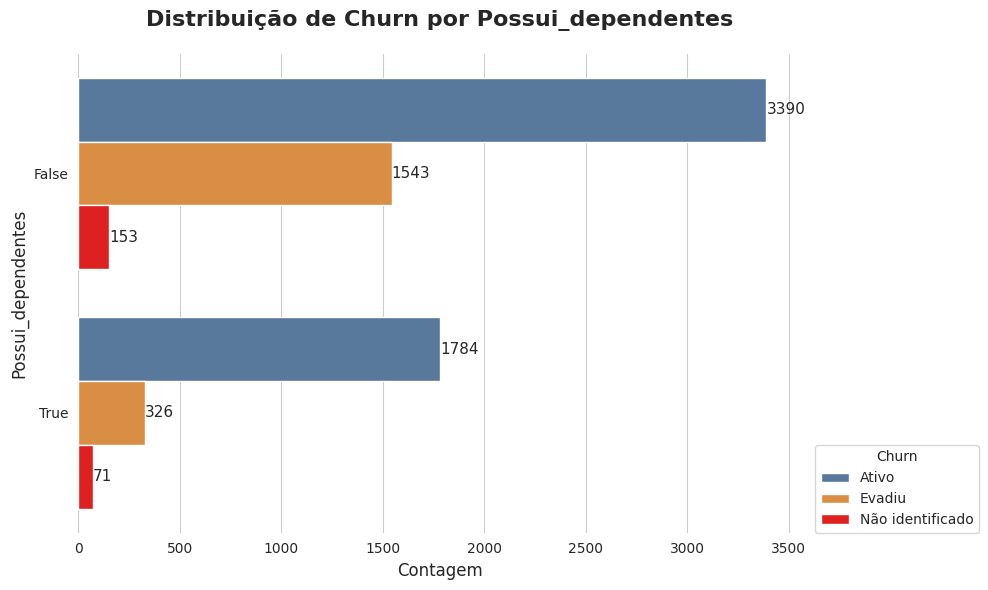

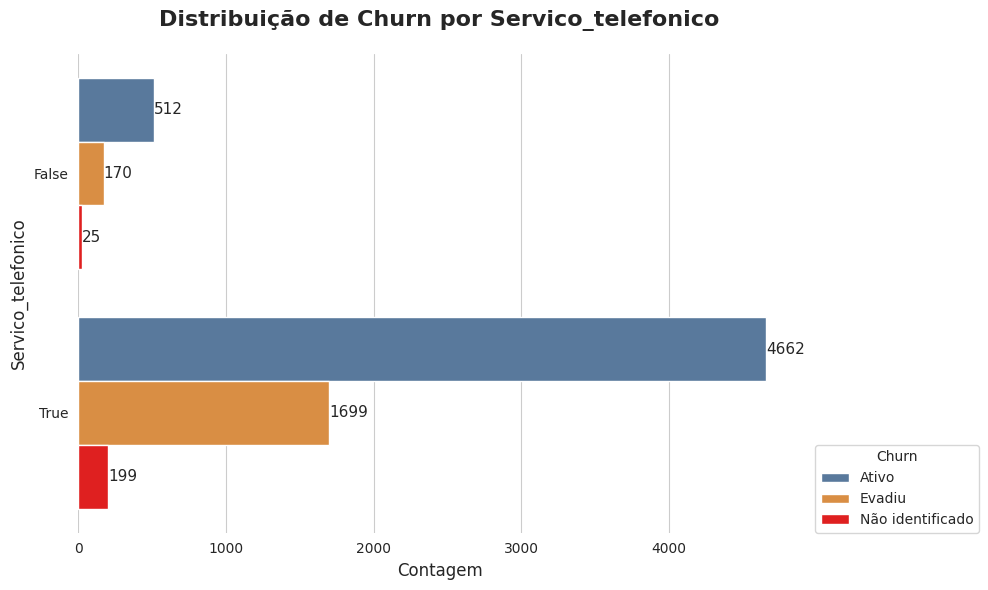

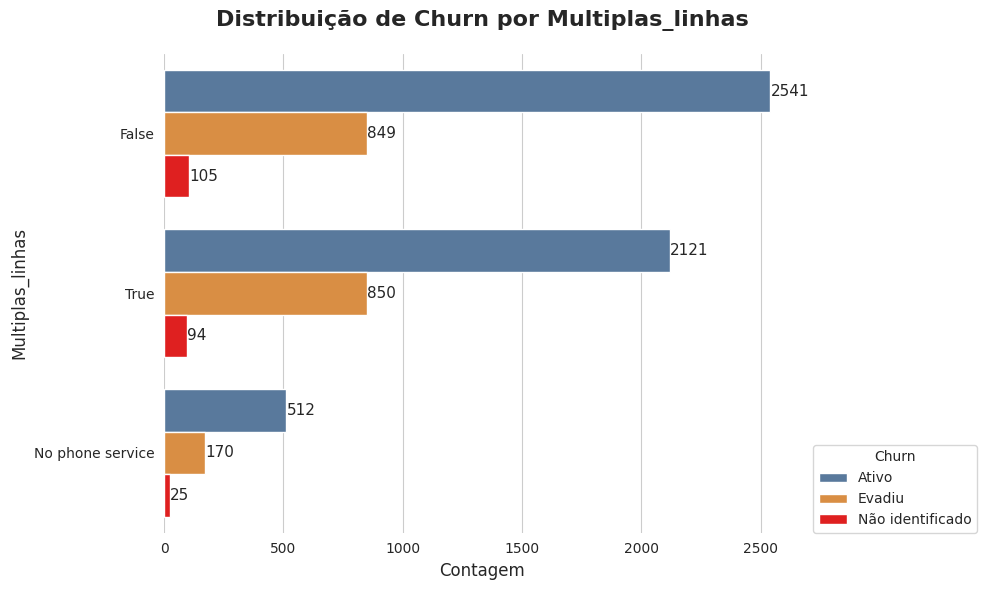

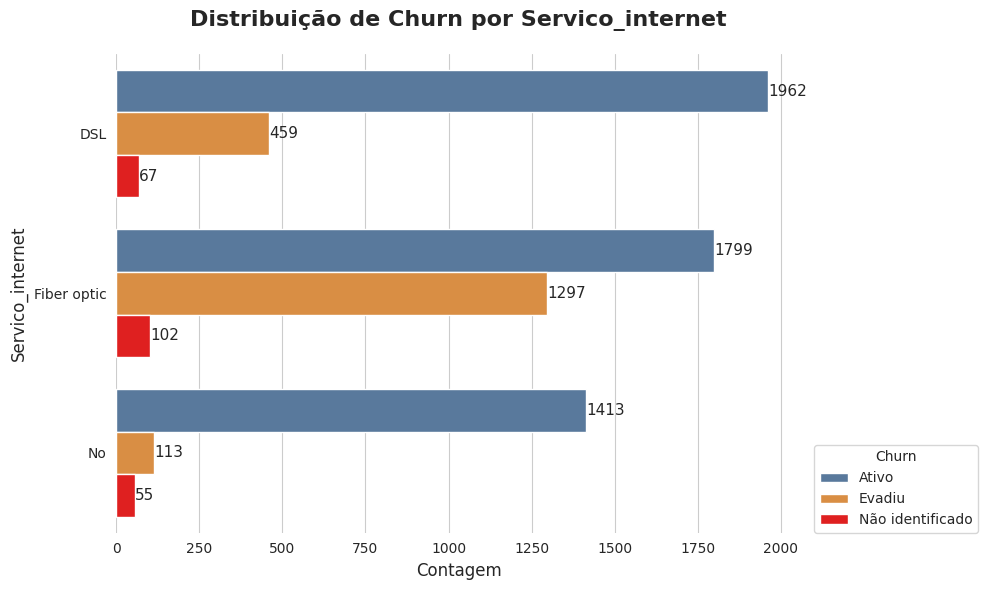

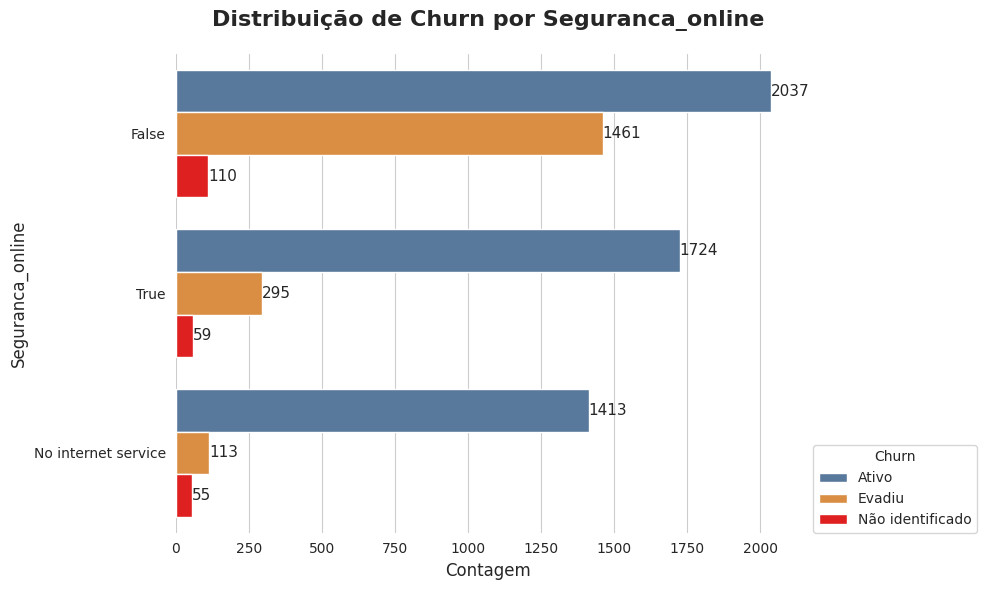

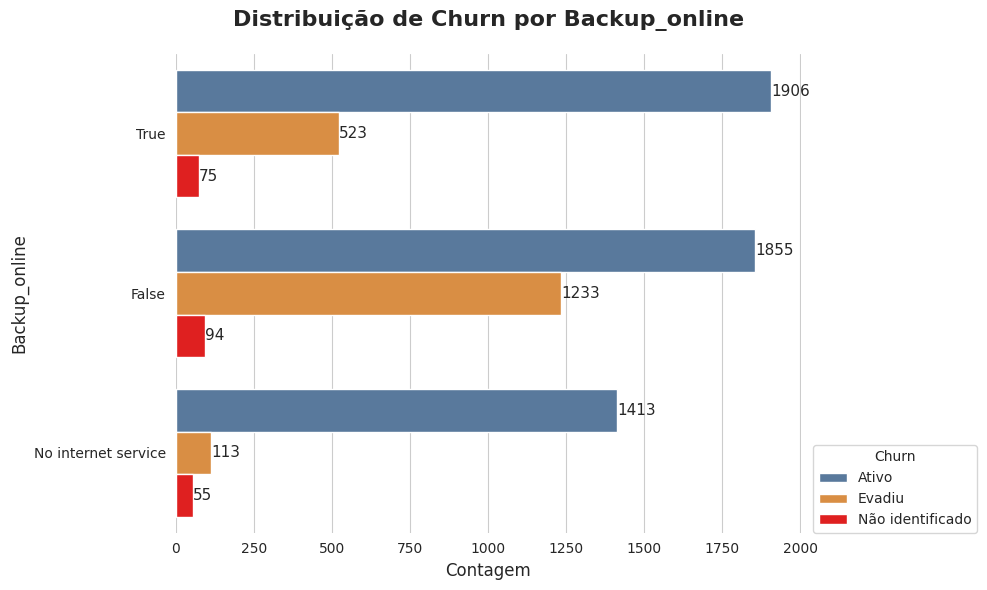

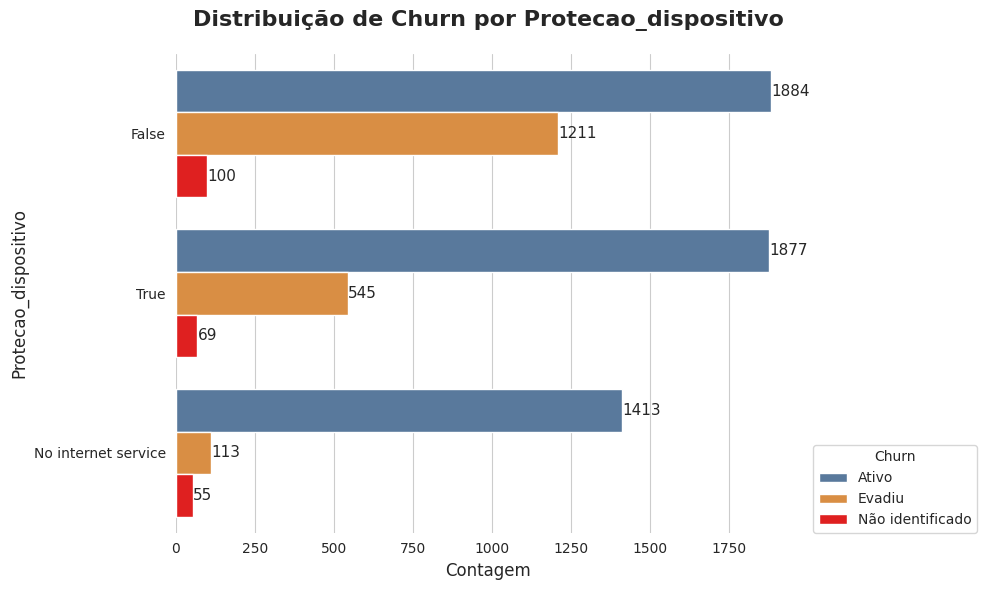

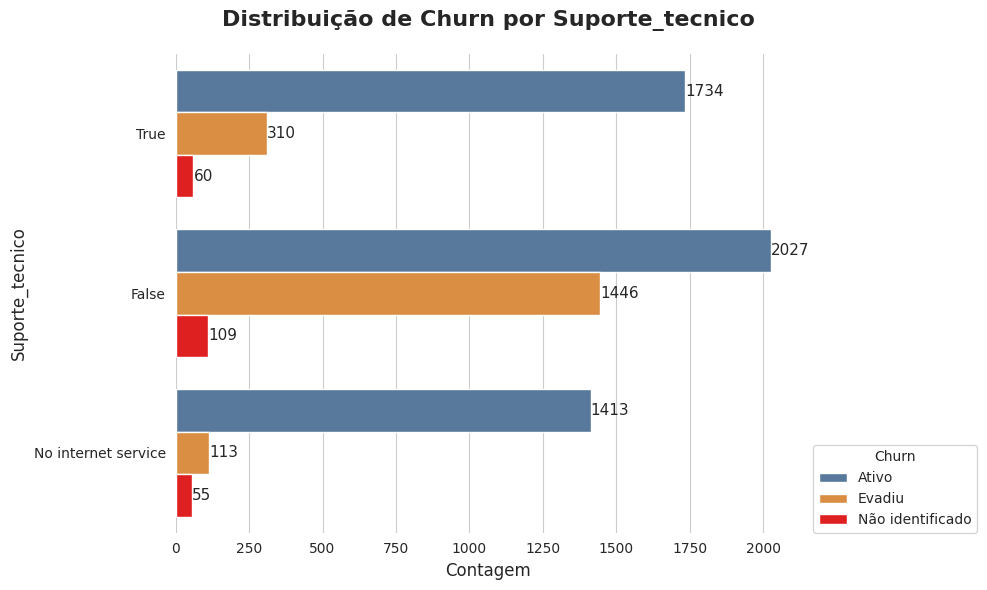

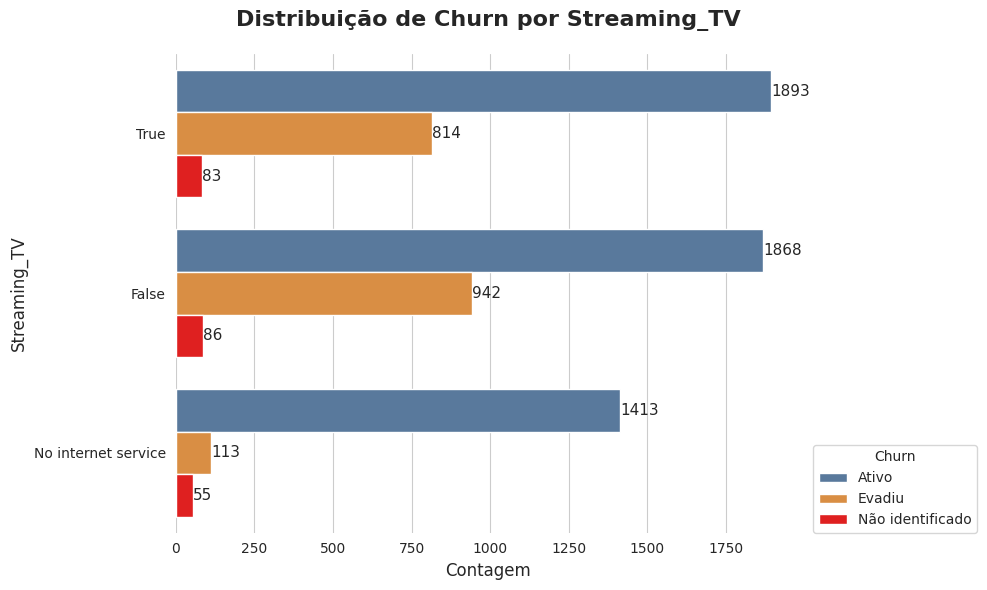

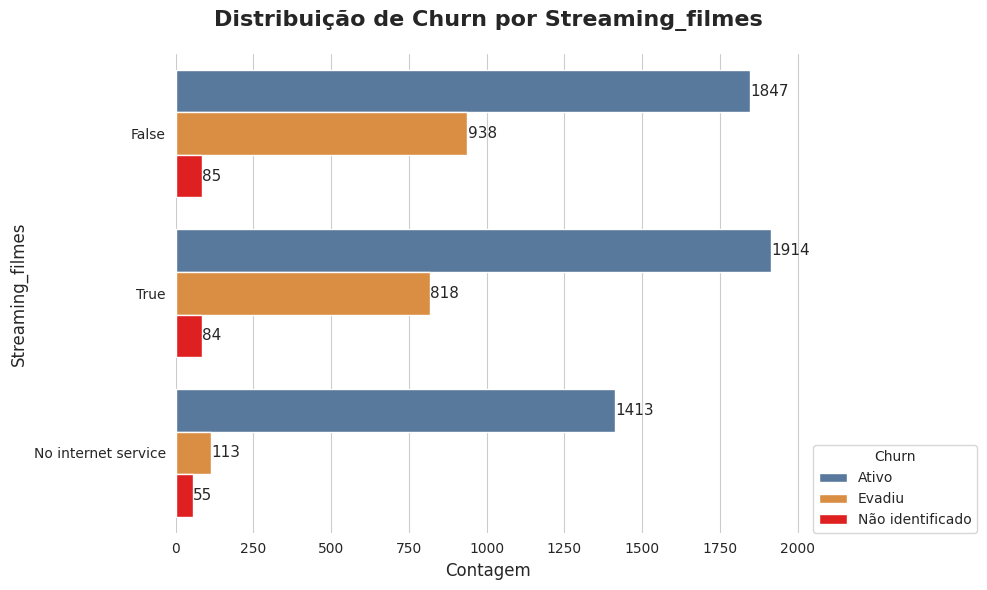

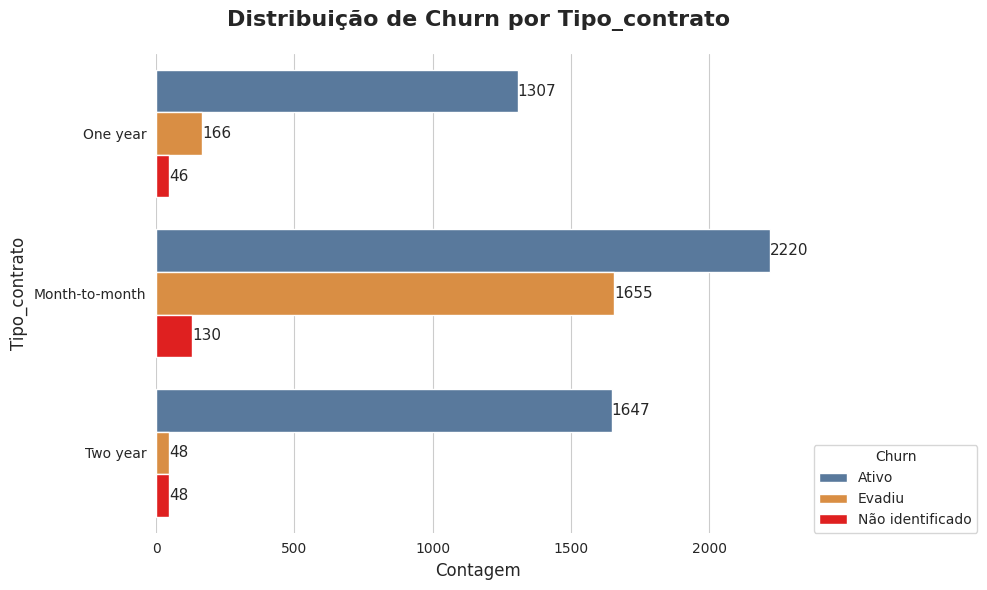

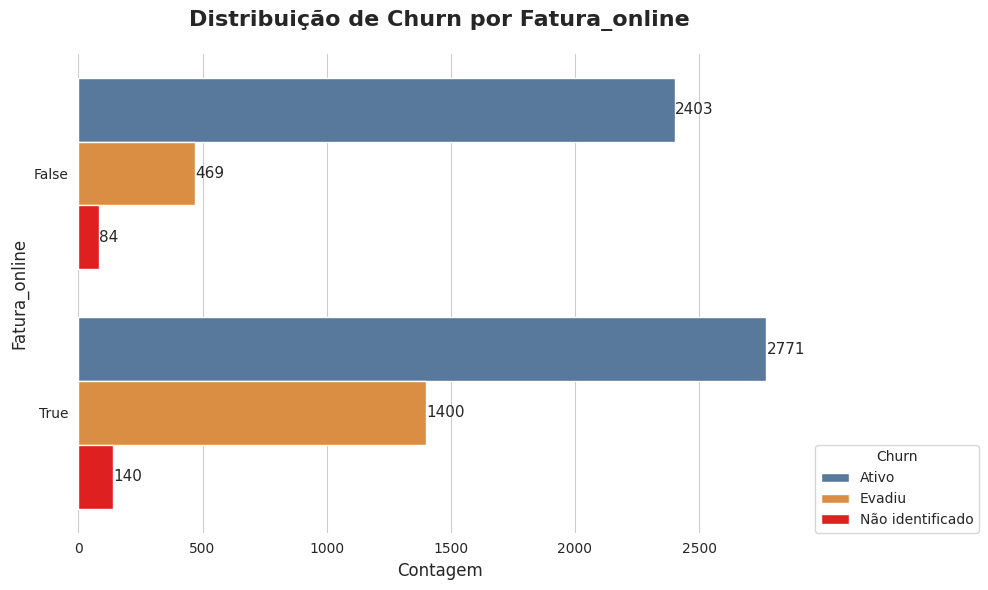

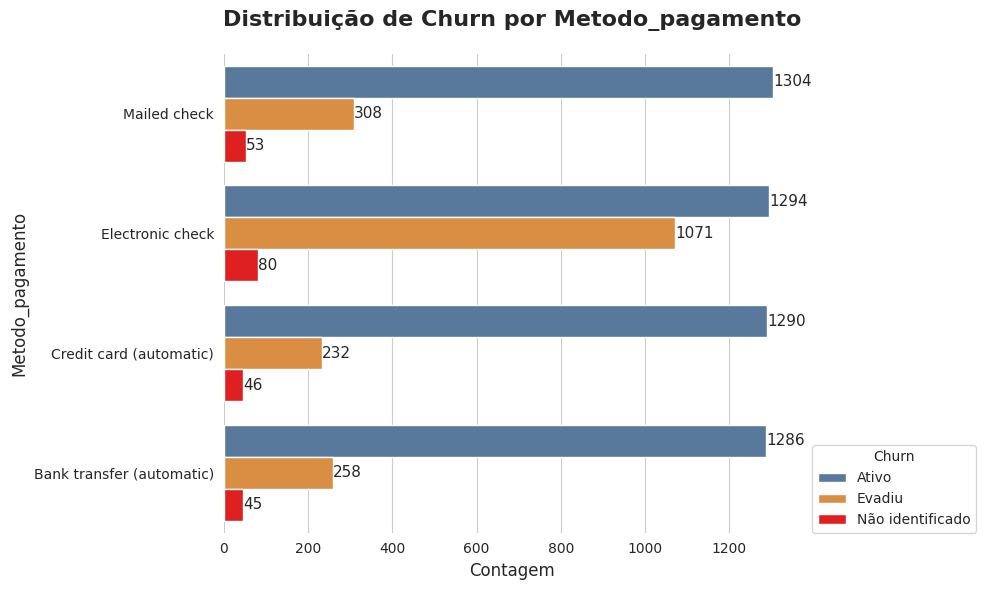

In [243]:
# Lista de colunas categóricas para análise (excluindo Churn e colunas numéricas)
colunas_categoricas = [
    'Genero', 'Idoso', 'Possui_parceiro', 'Possui_dependentes',
    'Servico_telefonico', 'Multiplas_linhas', 'Servico_internet',
    'Seguranca_online', 'Backup_online', 'Protecao_dispositivo',
    'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes',
    'Tipo_contrato', 'Fatura_online', 'Metodo_pagamento'
]

# Gerar gráficos para cada coluna
for coluna in colunas_categoricas:
    criar_graficos_distrib_churn(coluna,df_final)

#Análise dos dados obtidos das comparações das colunas categoricas em relação ao Churn.

   ## **Método_Pagamento:**
   
   ###  Clientes que possuem Débito em conta eletrônica (Electronic check) tem uma evasão maior, de um total de 2.445 clientes que escolheram esse metodo, 1.071 evadiram (acima de 45%). Os outros modos de pagamento Mailed check, Electronic check, Credit card (automatic) apresentam taxas de churn consideravelmente menores (entre 15% e 19%).
  
  ## **Tipo_Contrato**:
  ### Clientes com contrato **Mensal (Month-to-month)** possuem uma evasão consideravelmente maior, apresentando uma taxa de churn acima de 42% dos 3.875 clientes que optaram por esse intervalo de pagamento 1.655 evadiram, já os que optaram por contratos anuais, a taxa de evasão foi de  cerca de 11% com um total de 166 clientes enquanto os que optaram por contratos de dois anos a evasão ficou abaixo de 3% com um total de 48 evações de um total de 1.743 clientes que escolherão essa forma de pagamento, abaixo de 3%. Isso sugere que a flexibilidade do contrato mensal também leva a uma menor fidelidade.

  ## **Servico_Internet:**
  ### Clientes com **Fibra óptica** têm uma taxa de evasão maior que as demais,acima de 41% com um total de 3.198 clientes que optaram por este serviço, 1.297 evadiram, dos 2.488 clientes que optaram pela internet **DSL** apenas 459 evadiram, abaixo de 20%. Clientes **sem serviço de internet** têm uma indice de evasão muito baixa, indicando que o churn está fortemente associado aos serviços de internet.

  ## **Seguranca_Online, Backup_Online, Protecao_Dispositivo, Suporte_Tecnico:**
  ###  Clientes que não optaram por ter esses serviços adicionais tem um taxa de evasão por volta de 30%.

  ### No caso dos clientes que não contrataram o serviço de internet tem baixa evasão. Podemos destacar a evasão de clientes que não possuem os serviços de **Suporte_Tecnico** e **Seguranca_Online**, esses serviços demostraram ser importantes, pois para esses casos a taxa de evasão está acima dos 40%.
  
  ## **Idoso:**
  ### Ao realizar a análise de evasão dos clientes idosos, podemos notar que  de um total de 1182 clientes idosos, 476 evadiram, oque representa cerca de 40% de evasão apra este seguimento.

  ## **Possui_Parceiro / Possui_Dependentes:**
  ### Podemos notar através das análises realizadas que os clientes sem parceiros ou dependentes possuem uma evasão ligeiramete maior do que os clientes que possuem parceiros ou dependentes.


  ## **Demais comparações categoricas:**
  ### A categoria **Genero** não se mostrou ser um fator significativo para ser levado em consideração na análise de evasão neste caso estudado. A variação de evasão em relação ao genero do cliente não variou muito.    
  ### Podemos destacar também que a evasão se mostrou maior em clientes que possuem fatura online em comparação aos que não tem fatura online, podendo indicar que este é um ponto que a empresa pode melhorar.

## **Análise Inicial:**
### Após realizar as análises dos pesos dos parâmetros categóricos em relação a evasão, podemos perceber que os fatores que possuem peso maior para a evasão dos clientes são: **contrato mensal, serviço de fibra óptica, ser idoso, método de pagamento por débito eletrônico, ausência de serviços adicionais e não possuir parceiro/dependentes**


#Contagem de Evasão por Variáveis Numéricas:

In [244]:
#Separando colunas numéricas:
colunas_numericas = [
    "Meses_contrato",
    "Cobranca_mensal",
    "Cobranca_total",
    "Contas_diarias"
]

In [245]:
sns.set_style("whitegrid")

# Facilitando a compreenção do Churn:
df_final["Churn_label"] = df_final["Churn"].map({False: "False (Permaneceu)",True: "True (Cancelou)",'Não identificado':"Não identificado"})

#Fução para criar os Gráficos Boxplots:
def gerar_graficos_boxplots(coluna, data_frame):
    plt.figure(figsize=(8, 6))

    # Criar boxplot
    sns.boxplot(
    x="Churn_label",
    y=coluna,
    data=df_final,
    hue="Churn_label",
    palette=["skyblue", "salmon", "lightgreen"],
    legend=False
    )

    # Adicionar título e rótulos
    plt.title(f"Distribuição de {coluna} por Status de Churn", fontsize=16)
    plt.xlabel("Status do Cliente", fontsize=12)
    plt.ylabel(coluna, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

    # Remover bordas desnecessárias
    sns.despine()

    plt.show()


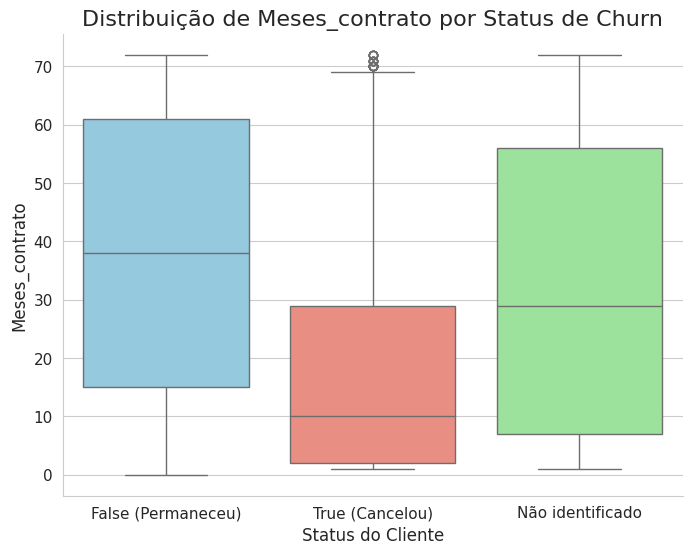

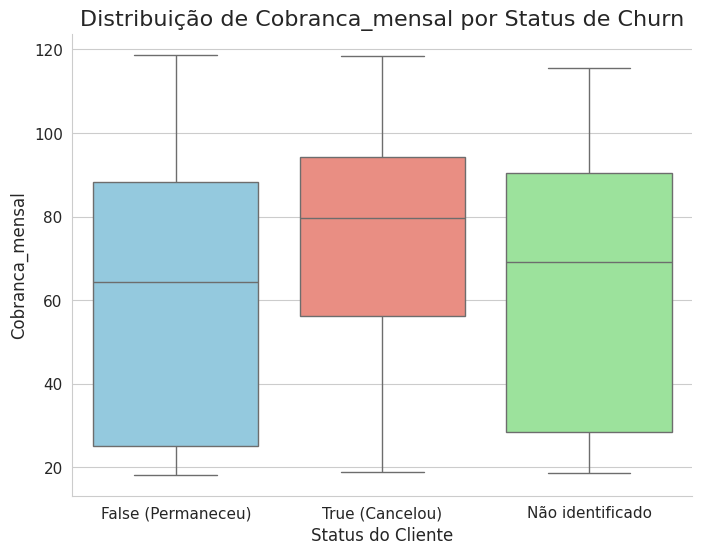

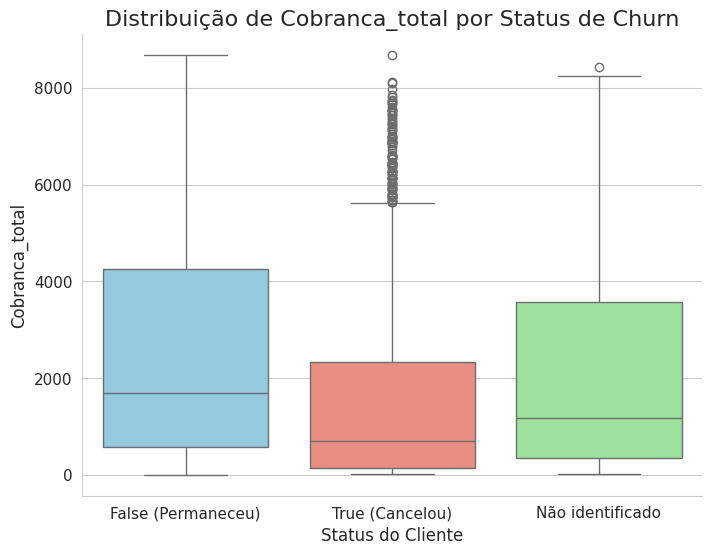

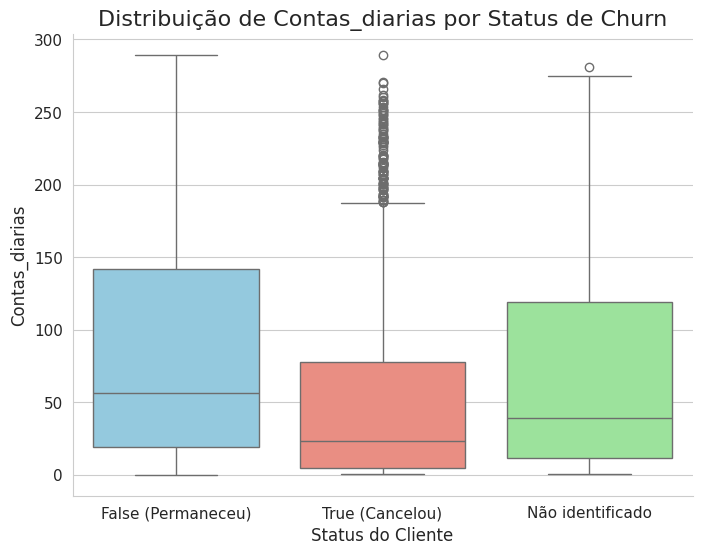

In [246]:
for coluna in colunas_numericas:
  gerar_graficos_boxplots(coluna, df_final)

# **Comparativo de Indicadores Numéricos por Status de Churn**


## Perfil dos Clientes que Cancelam:
###O grupo com Churn = True apresenta três características marcantes:

###Tempo de vínculo reduzido – em média, contratos duram significativamente menos, com mediana de 10 meses e 75% das ocorrências antes de 29 meses.

###Valores mensais mais elevados – metade paga acima de R\$ 79,65, e o intervalo típico varia entre R\$ 56,15 e R\$ 94,20.

###Cobrança diária proporcionalmente alta – mediana de R\$ 2,66, superior ao grupo ativo.

## **Perfil dos Clientes que Permanecem:**
### Para o grupo com Churn = False, a análise mostra:

###Maior longevidade no contrato – mediana de 38 meses, com 75% possuindo até 61 meses de vínculo.

###Cobranças mensais moderadas – mediana de R\$ 64,43, geralmente abaixo dos valores pagos por quem cancela.

###Acúmulo de cobrança total mais alto – mediana de R\$ 1.679,52, resultado do maior tempo de relacionamento, e não necessariamente de tarifas elevadas.

## Principais Diferenças Identificadas:
###O tempo de contrato é o elemento mais distintivo entre os dois grupos, seguido pelo valor mensal pago.

###A cobrança total acumulada reflete apenas a duração da permanência, não sendo indicativo direto de risco.

###Custos percebidos mais altos (mensais ou diários) estão associados a maior probabilidade de cancelamento.

## **Conclusão:**
###Clientes novos, com contratos curtos e pagamentos mensais/diários mais altos, demonstram maior propensão ao churn.
###Clientes com relacionamento mais longo e tarifas mais baixas tendem a permanecer.
###Essas evidências indicam que estratégias de retenção devem focar principalmente em clientes de curto prazo e com cobranças acima da média, ajustando preços ou oferecendo incentivos para aumentar o tempo de permanência.

#📄Relatorio Final

# **Projeto Churn de Clientes.**

# **Análise de Evasão de Clientes da Telecom X**
## **Introdução:**
###O projeto Churn de Clientes é uma iniciativa da empresa Telecom X, que tem como objetivo compreender a evasão de clientes que está ocorrendo nela. Este relatório contém uma análise minuciosa dos dados dos clientes da empresa, com o objetivo de compreender os fatores que levaram a essa evasão e sugerir ações que possam mitigar esse problema.

### As etapas realizadas para a formulação deste relátorio foram:
### - Coleta e tratamento dos dados.
### - Análises estatística visuais desses dados.
### - Conclusões apartir das análises realizadas.

## Coleta, Limpeza e Tratamento de Dados:
### Os dados brutos em formato JSON foram coletados diretamente de uma API e carregados via Python utilizando a biblioteca Pandas. Como o arquivo original continha estruturas aninhadas com informações complexas de clientes, serviços de telefonia, planos de internet e dados de conta, foi necessário normalizar esses dados transforma-los em dados hierárquicos em um formato tabular plano, para expandir-los em colunas individuais do DataFrame principal.

### Durante a verificação da qualidade dos dados, identificamos alguns problemas que exigiam tratamento. A coluna Charges.Total estava sendo interpretada como objeto, o que nos levou a converter seu tipo para float64 após a devida limpeza. Quanto aos valores ausentes, encontramos 224 registros sem classificação de Churn, que decidi categorizar como "Não identificado" para permitir uma análise segmentada desse grupo específico, e 11 valores faltantes na coluna Charges.Total - todos correspondentes a clientes com tempo de contrato igual a zero (tenure = 0), que foram substituídos por zero considerando que se tratava de clientes, supondo que se tratava de clientes recém-cadastrados sem histórico de cobrança.

###Para enriquecer nossa análise, criamos uma nova variável chamada Cobranca_diaria, calculada a partir da divisão da Cobranca_mensal por 30, que nos oferece uma visão sobre o custo diário dos clientes. Realizamos também uma padronização das colunas, convertendo todas as variáveis categóricas binárias (como Churn, Partner, Dependents) de formato Yes/No para booleanos True/False, e renomeamos todas as colunas para português - por exemplo, transformando tenure em Meses_Contrato e Charges.Monthly em Cobranca_Mensal visando maior clareza.

###Após a preparação dos dados, obtivemos nosso dataset final contendo 7.043 registros completos e 22 variáveis perfeitamente estruturadas, todas documentadas e prontas para as etapas subsequentes de análise exploratória e modelagem preditiva.

## Análise Exploratória de Dados (EDA)
###Com os dados limpos e padronizados, realizamos uma análise exploratória para entender a distribuição das variáveis e identificar relações com a variável alvo, Churn.

## Distribuição Geral do Churn
###Primeiramente, analisamos a proporção geral de clientes que cancelaram versus os que permaneceram. Observou-se um desbalanceamento, com a maioria dos clientes (aproximadamente 71.2%) permanecendo na base, enquanto 25.7% cancelaram e 3.1% dos clientes,224 deles, não possui identificação se sairam ou coninuão na empresa.

## **Análise de Churn por Variáveis Categóricas:**
###**Tipo de Contrato:** Podemos notar que nos contratos mensais é uma maior propensão a evasão. 1.655 clientes que optarma por essa forma de contrato evadiram da empresa, acima de 42% do total de clinetes que optaram por essa modalidade.

###**Serviço de Internet:** Clientes com Fibra Óptica apresentam churn significativamente maior acima de 41% ,de um total de 2.445 clientes que escolheram essa modalidade 1.071 evadiram, já clientes que optaram por DSL em vez de fibra apenas 20% deles evadiram. Clientes sem serviço de internet têm um indice de evasão muito baixo.

###**Método de Pagamento:** O pagamento via Débito Eletrônico (Electronic check) está associado à uma evasão acimade 45%.

###**Serviços Adicionais:** A análise revelou que os clientes que não optaram por incluir em seus pacotes os serviços adicionais de Suporte_Tecnico e Seguranca_Online tem uma taxa de evasão alta acima de 41%, revelando a importancia desses serviços para a reteção dos clientes.

###**Clientes Idosos e sem parceiros ou dependentes:** Foi revelado também que os clientes idosos e os sem parceiros ou dependentes mostraram taxas de evasão mais altas.

## **Evasão (Churn) por Variáveis Numéricas:**
###Foi realizada a comparação da distribuição de variáveis numéricas relevantes entre clientes que cancelaram e aqueles que permaneceram:

###**Meses de Contrato:** Clientes que cancelaram apresentaram, em média, um tempo de contrato significativamente menor, com mediana de 10 meses, em comparação a 38 meses para clientes que permaneceram. (Figura 6: Boxplot de Meses de Contrato por Status de Churn).

###**Cobrança Mensal:** Observou-se que clientes que cancelaram tendem a pagar valores mensais mais altos, com mediana de  R.79,65, contra R.64,43 para os que permaneceram.

##**Conclusões e Insights:**
###A análise dos dados da Telecom X revelou um conjunto de fatores fortemente associados à evasão de clientes (churn), permitindo traçar um perfil claro dos grupos mais vulneráveis.

##Observou-se que clientes com contratos mensais apresentam uma maior propensão ao cancelamento, indicando que a ausência de compromisso de longo prazo é um dos principais preditores de churn. Esse risco é ainda mais acentuado entre clientes recentes, especialmente nos primeiros meses de contrato, e entre aqueles que arcam com cobranças mensais mais elevadas.

###Outro ponto relevante é o impacto do tipo de serviço contratado: clientes que utilizam fibra óptica registram taxas de churn mais altas, possivelmente devido ao custo, à instabilidade percebida ou a expectativas não atendidas. O método de pagamento também demostrou ser um fator de risco, sendo o uso de débito eletrônico (Electronic check) associado a maiores índices de cancelamento. A ausência de serviços complementares, como Segurança Online e Suporte Técnico, amplia ainda mais essa vulnerabilidade, sugerindo que a falta de valor agregado influencia negativamente a retenção.Do ponto de vista demográfico, idosos e clientes sem parceiros ou dependentes figuram entre os perfis com maior probabilidade de saída.  

###Em contrapartida, alguns elementos demonstram forte associação à permanência: contratos de longo prazo com certa de 1 a 2 anos, aumentam significativamente a fidelidade. A adesão a serviços adicionais,especialmente Suporte Técnico e Segurança Online, também está relacionada a uma menor taxa de churn. Curiosamente, clientes sem serviço de internet apresentam uma taxa de evasão bastante reduzida, sugerindo que a maior parte do churn ocorre entre usuários de internet.

###Essas evidências reforçam que o valor percebido pelo cliente é crucial para a retenção. A combinação de preços altos com ausência de benefícios adicionais, especialmente entre usuários de fibra óptica, parece gerar a sensação de baixo custo-benefício, aumentando a probabilidade de cancelamento. Assim, compreender esses padrões permite à Telecom X direcionar esforços de forma mais estratégica para reduzir a evasão e fortalecer o relacionamento com seus clientes.

## Recomendações
###Tendo como base os insights obtidos após a análise dos dados dos clientes da Telecom , podemos definir algumas recomendações, a fim de aumentar a retenção de clientes e mitigar as evasões.

###Um dos pontos centrais é a melhoria da experiência dos clientes nos primeiros meses de contrato, fase crítica em que o risco de cancelamento é mais alto. É importante a empresa detalhar bem os serviços prestados para o cliente, a fim de deixá-lo a par sobre os serviços que está contratando, como usá-los e as vantagens que ele possui sendo cliente da Telecom X. Também é recomendado o acompanhamento da satisfação do cliente nos meses iniciais do contrato, a fim de resolver problemas de forma precoce e passar para o cliente uma sensação de valorização.

###Outra ação recomendada é o fortalecimento de serviços complementares, como Segurança Online e Suporte Técnico. Além de promover ativamente esses serviços de forma a destacar seus benefícios, especialmente para usuários de fibra óptica e clientes idosos, a empresa pode incluir um nível básico em planos mais caros ou oferecer períodos de teste gratuitos, incentivando a adesão e aumentando o valor percebido.

###Rever a estratégia de preços, especialmente da Fibra Óptica, também se faz necessária. Uma análise comparativa com o mercado, aliada à compreensão da percepção de valor dos clientes, pode guiar ajustes que tornem o serviço mais competitivo. Ofertas combinadas de serviços de valor agregado e promoções específicas para clientes com alto custo mensal e baixo tempo de contrato, podem contribuir para aumentar a retenção.

###Em relação aos métodos de pagamento, é recomendável investigar as razões pelas quais os clientes que optaram pelo débito eletrônico (Electronic check) apresentam maior índice de evasão. Entender se há problemas operacionais ou se esse método está relacionado a um perfil de cliente mais instável financeiramente é fundamental. Com base nisso, podem ser criados incentivos para migração para formas de pagamento associadas a menor evasão, como débito automático em conta ou cartão de crédito, oferecendo pequenos benefícios em troca.

###Incentivar contratos de longo prazo pode consolidar a relação com o cliente. Campanhas de migração de planos mensais para anuais ou bienais, com descontos progressivos, bônus de serviço e programas de fidelidade que recompensem maior tempo de contrato, são estratégias eficazes para reduzir a rotatividade.

###Recomendo também uma maior atenção aos clientes mais idosos. Um maior índice de evasão desse público pode estar relacionado à dificuldade que a terceira idade tem de utilizar novas tecnologias. Prestar um suporte mais atencioso para esse grupo poderia ajudar na retenção.

###Seguindo essas orientações baseadas em dados, acredito que a Telecom X será capaz de mitigar as evasões e aumentar a satisfação de seus clientes, ajudando assim a se destacar da concorrência.